🌆 DELHI WEATHER DATA ANALYSIS
Analyzing DailyDelhiClimate.csv dataset...
✅ DailyDelhiClimate.csv loaded successfully!
📊 Dataset shape: (1576, 5)

📋 DATASET INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1576 entries, 0 to 1575
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1576 non-null   object 
 1   meantemp      1576 non-null   float64
 2   humidity      1576 non-null   float64
 3   wind_speed    1576 non-null   float64
 4   meanpressure  1576 non-null   float64
dtypes: float64(4), object(1)
memory usage: 61.7+ KB
None

🔍 FIRST 5 ROWS:
         date   meantemp   humidity  wind_speed  meanpressure
0  2013-01-01  10.000000  84.500000    0.000000   1015.666667
1  2013-01-02   7.400000  92.000000    2.980000   1017.800000
2  2013-01-03   7.166667  87.000000    4.633333   1018.666667
3  2013-01-04   8.666667  71.333333    1.233333   1017.166667
4  2013-01-05   6.000000  86.833333    3.70000

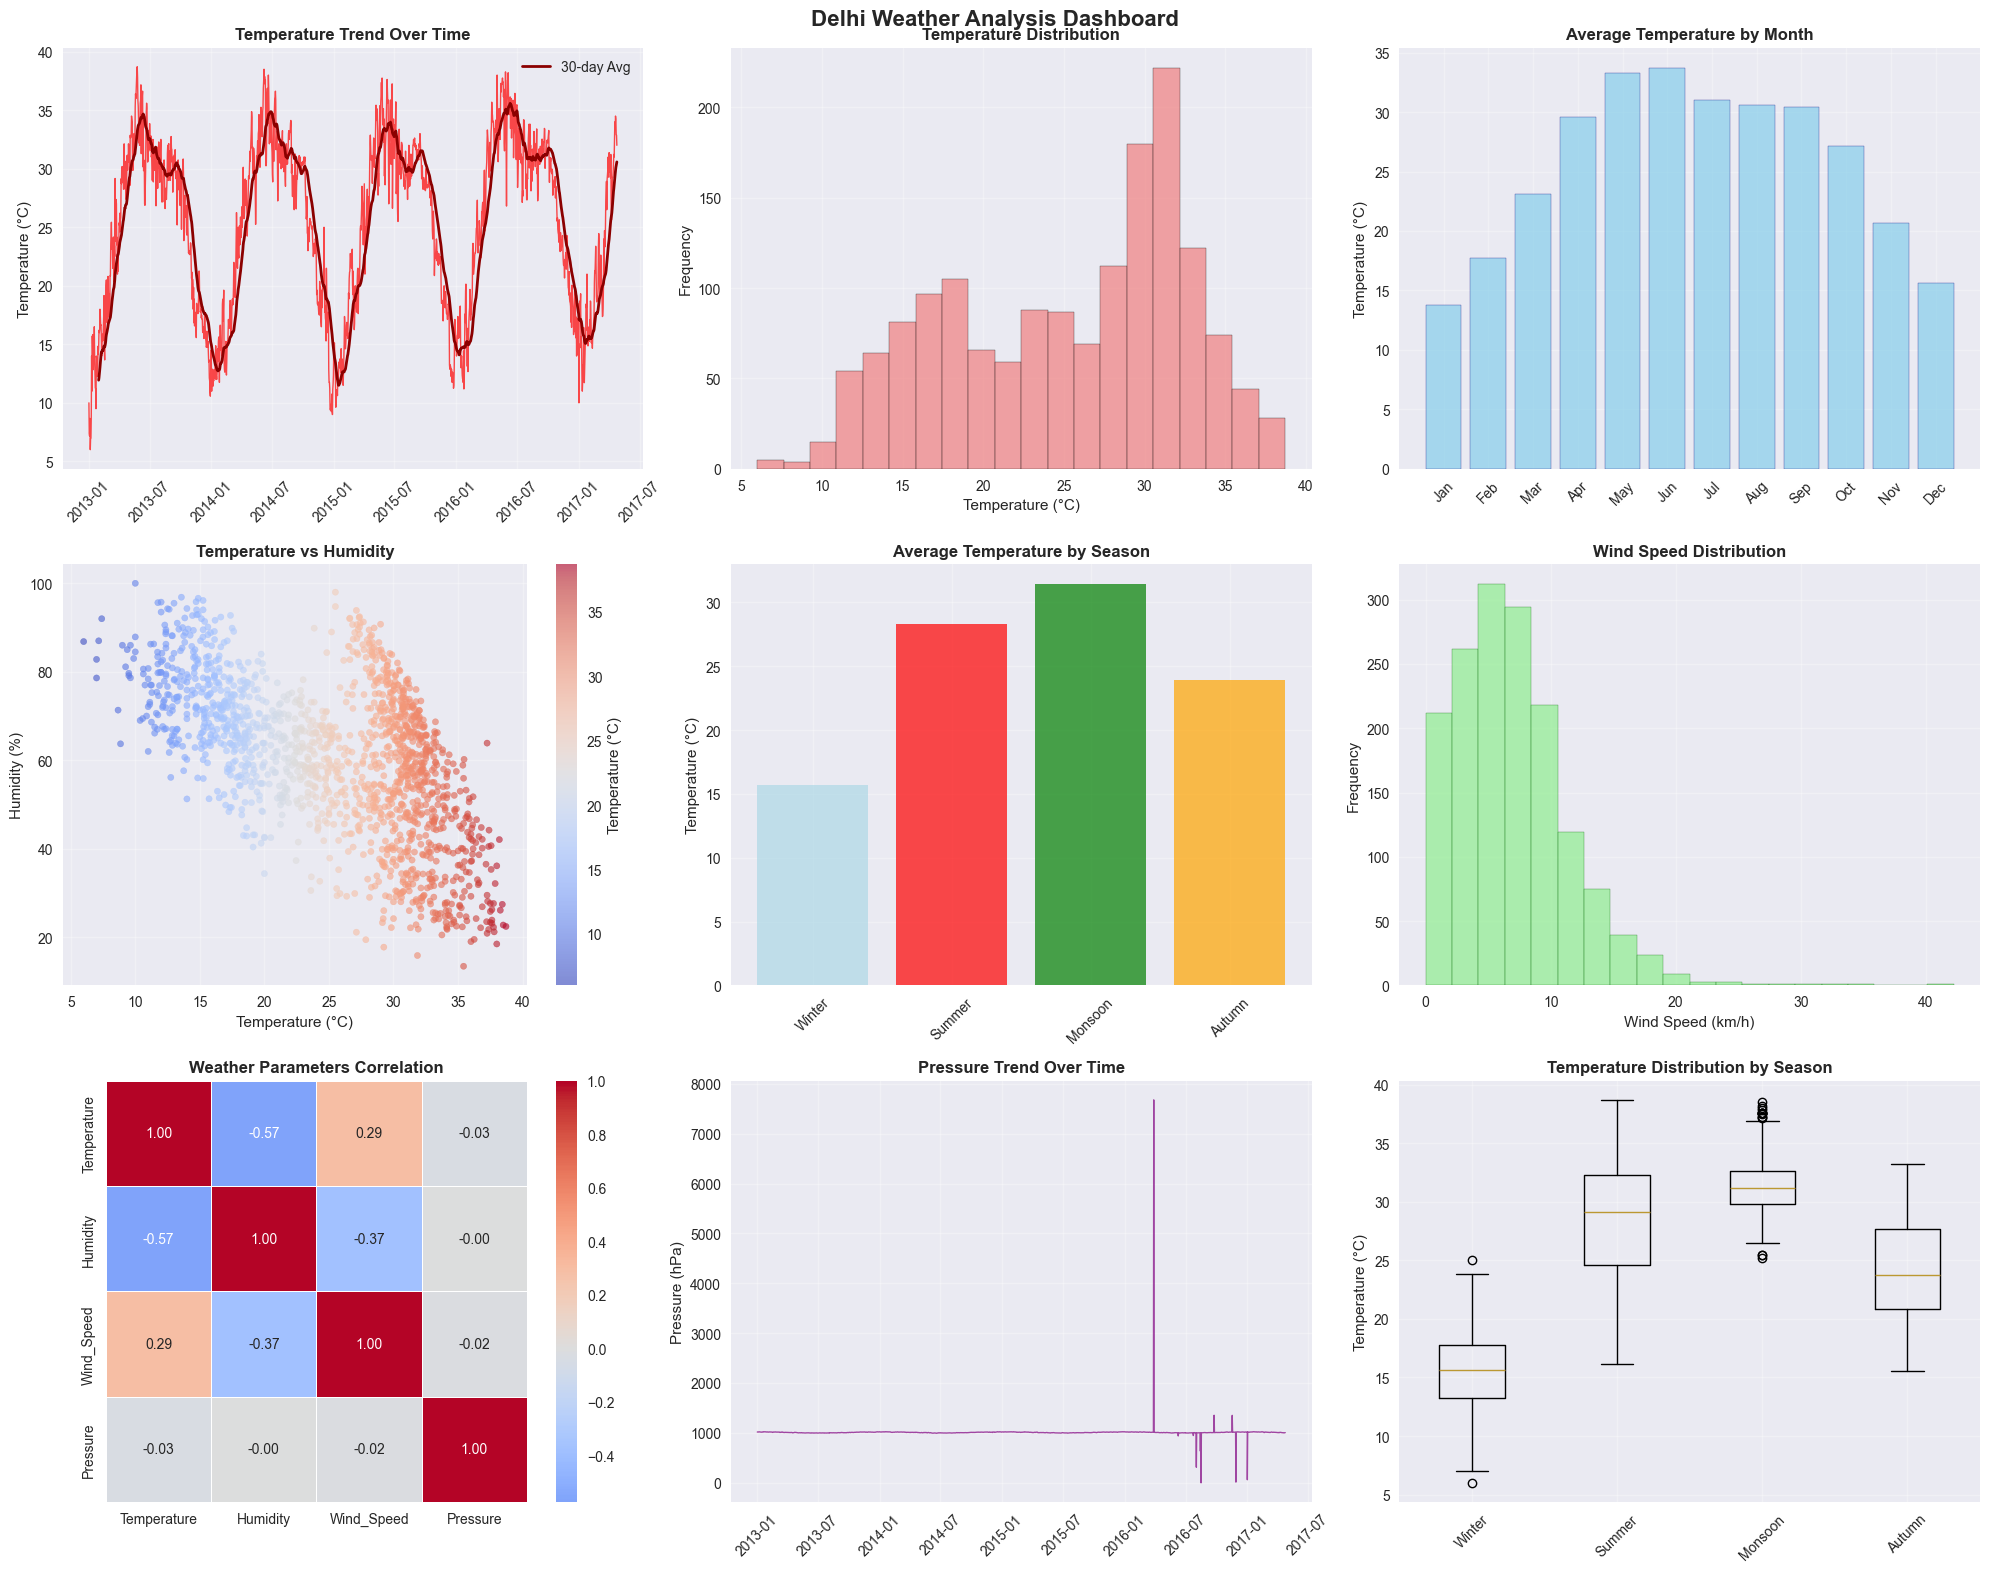

✅ Dashboard saved as 'delhi_weather_comprehensive_dashboard.png'

🎉 PROJECT COMPLETE!
📁 Outputs generated:
   - Comprehensive analysis in console
   - Visual dashboard: 'delhi_weather_comprehensive_dashboard.png'


In [1]:
# delhi_weather_analysis.py
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

class DelhiWeatherAnalyzer:
    def __init__(self, file_path):
        self.file_path = file_path
        self.df = None
        self.load_data()
    
    def load_data(self):
        """Load and clean the Delhi weather data"""
        try:
            self.df = pd.read_csv('DailyDelhiClimate.csv')
            print("✅ DailyDelhiClimate.csv loaded successfully!")
            print(f"📊 Dataset shape: {self.df.shape}")
            
            # Display basic info
            print("\n📋 DATASET INFO:")
            print(self.df.info())
            print("\n🔍 FIRST 5 ROWS:")
            print(self.df.head())
            print("\n📈 BASIC STATISTICS:")
            print(self.df.describe())
            
            # Data cleaning
            self.clean_data()
            
        except FileNotFoundError:
            print(f"❌ Error: File '{self.file_path}' not found!")
            print("Please make sure 'DailyDelhiClimate.csv' is in the same directory")
        except Exception as e:
            print(f"❌ Error loading data: {e}")
    
    def clean_data(self):
        """Clean and preprocess the data"""
        print("\n🧹 CLEANING DATA...")
        
        # Convert date column to datetime
        self.df['date'] = pd.to_datetime(self.df['date'])
        
        # Check for missing values
        missing_values = self.df.isnull().sum()
        if missing_values.any():
            print(f"Missing values found:\n{missing_values}")
            # Fill missing values with forward fill
            self.df.fillna(method='ffill', inplace=True)
        
        # Rename columns for consistency
        column_mapping = {
            'meantemp': 'Temperature',
            'humidity': 'Humidity', 
            'wind_speed': 'Wind_Speed',
            'meanpressure': 'Pressure'
        }
        self.df.rename(columns=column_mapping, inplace=True)
        
        # Extract time-based features
        self.df['Year'] = self.df['date'].dt.year
        self.df['Month'] = self.df['date'].dt.month
        self.df['Month_Name'] = self.df['date'].dt.month_name()
        self.df['Season'] = self.df['Month'].apply(self.get_season)
        
        print("✅ Data cleaning completed!")
        print(f"📅 Data period: {self.df['date'].min().date()} to {self.df['date'].max().date()}")
    
    def get_season(self, month):
        """Convert month to Indian season"""
        if month in [12, 1, 2]:
            return 'Winter'
        elif month in [3, 4, 5]:
            return 'Summer'
        elif month in [6, 7, 8, 9]:
            return 'Monsoon'
        else:
            return 'Autumn'
    
    def basic_analysis(self):
        """Perform basic weather analysis"""
        print("\n" + "="*60)
        print("🌡️ BASIC WEATHER ANALYSIS - DELHI")
        print("="*60)
        
        # Temperature Analysis
        avg_temp = self.df['Temperature'].mean()
        max_temp = self.df['Temperature'].max()
        min_temp = self.df['Temperature'].min()
        
        hottest_day = self.df.loc[self.df['Temperature'].idxmax()]
        coldest_day = self.df.loc[self.df['Temperature'].idxmin()]
        
        print(f"\n🌡️ TEMPERATURE ANALYSIS:")
        print(f"Average Temperature: {avg_temp:.2f}°C")
        print(f"Maximum Temperature: {max_temp:.2f}°C")
        print(f"Minimum Temperature: {min_temp:.2f}°C")
        print(f"🔥 Hottest Day: {hottest_day['date'].strftime('%Y-%m-%d')} - {max_temp:.2f}°C")
        print(f"❄️ Coldest Day: {coldest_day['date'].strftime('%Y-%m-%d')} - {min_temp:.2f}°C")
        
        # Humidity Analysis
        avg_humidity = self.df['Humidity'].mean()
        print(f"\n💧 HUMIDITY ANALYSIS:")
        print(f"Average Humidity: {avg_humidity:.2f}%")
        
        # Wind Speed Analysis
        avg_wind = self.df['Wind_Speed'].mean()
        print(f"\n💨 WIND SPEED ANALYSIS:")
        print(f"Average Wind Speed: {avg_wind:.2f} km/h")
        
        # Pressure Analysis
        avg_pressure = self.df['Pressure'].mean()
        print(f"\n📊 PRESSURE ANALYSIS:")
        print(f"Average Pressure: {avg_pressure:.2f} hPa")
    
    def seasonal_analysis(self):
        """Analyze seasonal patterns"""
        print("\n" + "="*50)
        print("🍂 SEASONAL ANALYSIS")
        print("="*50)
        
        # Seasonal averages
        seasonal_stats = self.df.groupby('Season').agg({
            'Temperature': ['mean', 'max', 'min'],
            'Humidity': 'mean',
            'Wind_Speed': 'mean'
        }).round(2)
        
        print("📊 Seasonal Weather Patterns:")
        print(seasonal_stats)
        
        # Monthly analysis
        monthly_avg = self.df.groupby('Month_Name').agg({
            'Temperature': 'mean',
            'Humidity': 'mean'
        }).round(2)
        
        print("\n📅 Monthly Averages:")
        print(monthly_avg)
    
    def correlation_analysis(self):
        """Analyze correlations between weather parameters"""
        print("\n" + "="*50)
        print("🔗 CORRELATION ANALYSIS")
        print("="*50)
        
        # Calculate correlations
        numeric_cols = ['Temperature', 'Humidity', 'Wind_Speed', 'Pressure']
        correlation_matrix = self.df[numeric_cols].corr()
        
        print("Correlation Matrix:")
        print(correlation_matrix.round(3))
        
        # Key insights
        temp_humidity_corr = correlation_matrix.loc['Temperature', 'Humidity']
        temp_pressure_corr = correlation_matrix.loc['Temperature', 'Pressure']
        
        print(f"\n💡 KEY INSIGHTS:")
        print(f"Temperature-Humidity Correlation: {temp_humidity_corr:.3f}")
        if temp_humidity_corr < 0:
            print("  → Temperature increases, Humidity decreases (typical pattern)")
        else:
            print("  → Unusual pattern: Temperature and Humidity increase together")
        
        print(f"Temperature-Pressure Correlation: {temp_pressure_corr:.3f}")
    
    def extreme_events_analysis(self):
        """Identify extreme weather events"""
        print("\n" + "="*50)
        print("⚡ EXTREME WEATHER EVENTS")
        print("="*50)
        
        # Heat waves (temperature > 95th percentile)
        heat_wave_threshold = self.df['Temperature'].quantile(0.95)
        heat_waves = self.df[self.df['Temperature'] > heat_wave_threshold]
        
        print(f"🔥 HEAT WAVES (Temperature > {heat_wave_threshold:.1f}°C):")
        print(f"Number of heat wave days: {len(heat_waves)}")
        if not heat_waves.empty:
            print("Top 5 hottest days:")
            for idx, row in heat_waves.nlargest(5, 'Temperature').iterrows():
                print(f"  {row['date'].strftime('%Y-%m-%d')}: {row['Temperature']}°C")
        
        # High humidity days
        high_humidity_threshold = self.df['Humidity'].quantile(0.90)
        high_humidity_days = self.df[self.df['Humidity'] > high_humidity_threshold]
        
        print(f"\n💦 HIGH HUMIDITY DAYS (Humidity > {high_humidity_threshold:.1f}%):")
        print(f"Number of high humidity days: {len(high_humidity_days)}")
    
    def create_comprehensive_dashboard(self):
        """Create a comprehensive visualization dashboard"""
        print("\n🎨 CREATING VISUALIZATIONS...")
        
        fig = plt.figure(figsize=(20, 16))
        fig.suptitle('Delhi Weather Analysis Dashboard', fontsize=16, fontweight='bold')
        
        # 1. Temperature Trend Over Time
        ax1 = plt.subplot(3, 3, 1)
        ax1.plot(self.df['date'], self.df['Temperature'], color='red', alpha=0.7, linewidth=1)
        ax1.set_title('Temperature Trend Over Time', fontweight='bold')
        ax1.set_ylabel('Temperature (°C)')
        ax1.tick_params(axis='x', rotation=45)
        ax1.grid(True, alpha=0.3)
        
        # Add moving average
        rolling_avg = self.df['Temperature'].rolling(window=30).mean()
        ax1.plot(self.df['date'], rolling_avg, color='darkred', linewidth=2, label='30-day Avg')
        ax1.legend()
        
        # 2. Temperature Distribution
        ax2 = plt.subplot(3, 3, 2)
        ax2.hist(self.df['Temperature'], bins=20, color='lightcoral', edgecolor='black', alpha=0.7)
        ax2.set_title('Temperature Distribution', fontweight='bold')
        ax2.set_xlabel('Temperature (°C)')
        ax2.set_ylabel('Frequency')
        ax2.grid(True, alpha=0.3)
        
        # 3. Monthly Temperature Patterns
        ax3 = plt.subplot(3, 3, 3)
        monthly_temp = self.df.groupby('Month')['Temperature'].mean()
        months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
        ax3.bar(months, monthly_temp, color='skyblue', edgecolor='navy', alpha=0.7)
        ax3.set_title('Average Temperature by Month', fontweight='bold')
        ax3.set_ylabel('Temperature (°C)')
        ax3.tick_params(axis='x', rotation=45)
        ax3.grid(True, alpha=0.3)
        
        # 4. Temperature vs Humidity Scatter
        ax4 = plt.subplot(3, 3, 4)
        scatter = ax4.scatter(self.df['Temperature'], self.df['Humidity'], 
                            c=self.df['Temperature'], cmap='coolwarm', alpha=0.6, s=20)
        ax4.set_title('Temperature vs Humidity', fontweight='bold')
        ax4.set_xlabel('Temperature (°C)')
        ax4.set_ylabel('Humidity (%)')
        ax4.grid(True, alpha=0.3)
        plt.colorbar(scatter, ax=ax4, label='Temperature (°C)')
        
        # 5. Seasonal Analysis
        ax5 = plt.subplot(3, 3, 5)
        seasonal_temp = self.df.groupby('Season')['Temperature'].mean()
        seasons_ordered = ['Winter', 'Summer', 'Monsoon', 'Autumn']
        seasonal_temp = seasonal_temp.reindex(seasons_ordered)
        ax5.bar(seasonal_temp.index, seasonal_temp.values, 
               color=['lightblue', 'red', 'green', 'orange'], alpha=0.7)
        ax5.set_title('Average Temperature by Season', fontweight='bold')
        ax5.set_ylabel('Temperature (°C)')
        ax5.tick_params(axis='x', rotation=45)
        ax5.grid(True, alpha=0.3)
        
        # 6. Wind Speed Distribution
        ax6 = plt.subplot(3, 3, 6)
        ax6.hist(self.df['Wind_Speed'], bins=20, color='lightgreen', edgecolor='darkgreen', alpha=0.7)
        ax6.set_title('Wind Speed Distribution', fontweight='bold')
        ax6.set_xlabel('Wind Speed (km/h)')
        ax6.set_ylabel('Frequency')
        ax6.grid(True, alpha=0.3)
        
        # 7. Correlation Heatmap
        ax7 = plt.subplot(3, 3, 7)
        numeric_cols = ['Temperature', 'Humidity', 'Wind_Speed', 'Pressure']
        corr_matrix = self.df[numeric_cols].corr()
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
                   square=True, linewidths=0.5, ax=ax7, fmt='.2f')
        ax7.set_title('Weather Parameters Correlation', fontweight='bold')
        
        # 8. Pressure Trend
        ax8 = plt.subplot(3, 3, 8)
        ax8.plot(self.df['date'], self.df['Pressure'], color='purple', alpha=0.7, linewidth=1)
        ax8.set_title('Pressure Trend Over Time', fontweight='bold')
        ax8.set_ylabel('Pressure (hPa)')
        ax8.tick_params(axis='x', rotation=45)
        ax8.grid(True, alpha=0.3)
        
        # 9. Boxplot of Temperature by Season
        ax9 = plt.subplot(3, 3, 9)
        season_data = [self.df[self.df['Season'] == season]['Temperature'] for season in seasons_ordered]
        ax9.boxplot(season_data, labels=seasons_ordered)
        ax9.set_title('Temperature Distribution by Season', fontweight='bold')
        ax9.set_ylabel('Temperature (°C)')
        ax9.tick_params(axis='x', rotation=45)
        ax9.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.savefig('delhi_weather_comprehensive_dashboard.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        print("✅ Dashboard saved as 'delhi_weather_comprehensive_dashboard.png'")
    
    def generate_report(self):
        """Generate a comprehensive weather report"""
        print("\n" + "="*60)
        print("📊 COMPREHENSIVE DELHI WEATHER REPORT")
        print("="*60)
        
        self.basic_analysis()
        self.seasonal_analysis()
        self.correlation_analysis()
        self.extreme_events_analysis()
        
        print("\n" + "="*60)
        print("🎯 KEY FINDINGS:")
        print("="*60)
        
        # Generate key insights
        avg_temp = self.df['Temperature'].mean()
        max_temp = self.df['Temperature'].max()
        min_temp = self.df['Temperature'].min()
        
        print(f"1. Delhi experiences temperatures ranging from {min_temp:.1f}°C to {max_temp:.1f}°C")
        print(f"2. Average annual temperature: {avg_temp:.1f}°C")
        
        # Seasonal insights
        summer_avg = self.df[self.df['Season'] == 'Summer']['Temperature'].mean()
        winter_avg = self.df[self.df['Season'] == 'Winter']['Temperature'].mean()
        print(f"3. Summer average: {summer_avg:.1f}°C, Winter average: {winter_avg:.1f}°C")
        
        # Monsoon insights
        monsoon_humidity = self.df[self.df['Season'] == 'Monsoon']['Humidity'].mean()
        print(f"4. Monsoon season has highest humidity: {monsoon_humidity:.1f}%")
        
        print("\n✅ Analysis complete! Check the generated dashboard for visual insights.")

# Main execution
if __name__ == "__main__":
    print("🌆 DELHI WEATHER DATA ANALYSIS")
    print("=" * 50)
    print("Analyzing DailyDelhiClimate.csv dataset...")
    
    # Initialize analyzer
    analyzer = DelhiWeatherAnalyzer('DailyDelhiClimate.csv')
    
    # Perform comprehensive analysis
    analyzer.generate_report()
    
    # Create visualizations
    analyzer.create_comprehensive_dashboard()
    
    print("\n🎉 PROJECT COMPLETE!")
    print("📁 Outputs generated:")
    print("   - Comprehensive analysis in console")
    print("   - Visual dashboard: 'delhi_weather_comprehensive_dashboard.png'")